In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [259]:
original_file_energy = pd.read_csv("Energy_data.csv")

In [260]:
# Filter the DataFrame to keep only rows where 'Gas' is equal to 'CO2e (t) GWP-AR2'
filtered_df = original_file_energy[original_file_energy['Gas'] == 'CO2e (t) GWP-AR2']

# Save the filtered DataFrame to a new CSV file
output_file_name = 'energy_filtered_CO2e_GWP_AR2.csv'
filtered_df.to_csv(output_file_name, index=False)

print(f"Filtered data saved to {output_file_name}")


Filtered data saved to energy_filtered_CO2e_GWP_AR2.csv


In [261]:
energy_filtered_gwp_ar2 = pd.read_csv("energy_filtered_CO2e_GWP_AR2.csv")

In [262]:
energy_filtered_gwp_ar2

,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,Level 7,Emission / Removal / Bunker,Gas,State,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Energy,Fuel Combustion Emissions,Transport,Road,NaN,Motor Spirit,NaN,Emissions,CO2e (t) GWP-AR2,Andhra Pradesh,...,1973078,2273021,2595307,2932546,3284627,3599342,3836534,4204346,2952160,2617744
1,Energy,Fuel Combustion Emissions,Transport,Road,NaN,Motor Spirit,NaN,Emissions,CO2e (t) GWP-AR2,Andaman & Nicobar Islands,...,18758,22602,24906,28255,31163,32382,33475,35589,38270,42736
2,Energy,Fuel Combustion Emissions,Transport,Road,NaN,Motor Spirit,NaN,Emissions,CO2e (t) GWP-AR2,Arunachal Pradesh,...,38176,41918,45644,55636,59512,65251,70377,81053,86886,96045
3,Energy,Fuel Combustion Emissions,Transport,Road,NaN,Motor Spirit,NaN,Emissions,CO2e (t) GWP-AR2,Assam,...,299118,323992,350014,402946,455147,501216,523715,578794,666757,803368
4,Energy,Fuel Combustion Emissions,Transport,Road,NaN,Motor Spirit,NaN,Emissions,CO2e (t) GWP-AR2,Bihar,...,405233,472057,560311,692354,822008,913831,992195,1137651,1314536,1626115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,Energy,Fuel Combustion Emissions,Industries,Textile and Leather,NaN,Petroleum Fuels,Naptha/Diesel/Furnace oils and other fuel oils,Emissions,CO2e (t) GWP-AR2,Sikkim,...,0,0,0,0,0,0,0,0,0,0
4748,Energy,Fuel Combustion Emissions,Industries,Textile and Leather,NaN,Petroleum Fuels,Other Petroleum Oils,Emissions,CO2e (t) GWP-AR2,Sikkim,...,0,0,0,0,0,0,0,0,0,0
4749,Energy,Fuel Combustion Emissions,Industries,Textile and Leather,NaN,Petroleum Fuels,Petroleum coke,Emissions,CO2e (t) GWP-AR2,Sikkim,...,0,0,0,0,0,0,0,0,0,0
4750,Energy,Fuel Combustion Emissions,Industries,Wood and wood products,NaN,Natural Gas and its derivatives,Natural Gas and its derivatives,Emissions,CO2e (t) GWP-AR2,Tamil Nadu,...,0,0,0,0,0,0,0,0,0,0


In [416]:
import pandas as pd

# Assuming the data is loaded into a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')  # If your data is in a CSV file, load it first

# For now, I'm assuming 'df' is already loaded with your data

# Select only the columns 'State' and emissions for 2010
# We're assuming that all the emissions columns are in a specific column like '2010'
emissions_2010 = energy_filtered_gwp_ar2[['State', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

# Remove rows with missing emissions values for 2010
emissions_2010 = emissions_2010.dropna(subset=['2010'])

# Sum the emissions for all categories for each state for the year 2010
state_emissions_2010 = emissions_2010.groupby('State')['2010'].sum()

# Sort the states by total emissions in 2010 in descending order
top_states_2010 = state_emissions_2010.sort_values(ascending=False)


top_states_2010_energy = top_states_2010

# Add a new column 'energy_values' with the same values as the sorted emissions
top_states_2010_energy_df = top_states_2010.reset_index()  # Convert the Series to a DataFrame
top_states_2010_energy_df.columns = ['State', 'energy_values']  # Rename columns

# Save the DataFrame to a CSV file
top_states_2010_energy_df.to_csv('top_states_2010_energy.csv', index=False)

# Display a confirmation message
print("Data saved to 'top_states_2010_energy.csv'.")


Data saved to 'top_states_2010_energy.csv'.


In [ ]:



# List of columns representing the years 2005 to 2015
year_columns = [str(year) for year in range(2005, 2016)]

# Dictionary to store results for each category
category_sums = {}

# Calculate the summation for each category in 'Level 1'
for category in energy_filtered_gwp_ar2['Level 2'].unique():
    # Filter rows for the current category
    category_df = energy_filtered_gwp_ar2[energy_filtered_gwp_ar2['Level 2'] == category]
    
    # Sum emissions for each year
    category_sums[category] = category_df[year_columns].sum()

# Convert the dictionary to a DataFrame for easier display and export
category_sums_df = pd.DataFrame(category_sums, index=year_columns).transpose()

# Add a row for the final summation for all categories
category_sums_df.loc['Total'] = category_sums_df.sum()

# Display the results
print(category_sums_df)

# Save the results to a CSV file
category_sums_df.to_csv('energy_yearly_emissions_by_category_level2_and_total.csv')
print("Yearly emissions by category and totals saved to 'energy_yearly_emissions_by_category_level2_and_total.csv'")

                                2005       2006       2007       2008  \
Fuel Combustion Emissions 1008696665 1082605240 1187800014 1268800833   
Fugitive Emissions          35465736   35136238   35745254   36663088   
Total                     1044162402 1117741478 1223545268 1305463921   

                                2009       2010       2011       2012  \
Fuel Combustion Emissions 1364582591 1435416175 1518517619 1638578031   
Fugitive Emissions          43011686   46491747   44743643   42470669   
Total                     1407594277 1481907922 1563261262 1681048701   

                                2013       2014       2015  
Fuel Combustion Emissions 1700772616 1803972857 1825745026  
Fugitive Emissions          39954899   37903706   36369158  
Total                     1740727515 1841876564 1862114184  
Yearly emissions by category and totals saved to 'energy_yearly_emissions_by_category_level2_and_total.csv'


In [264]:
energy_yearly_emissions_by_category_level2_and_total = pd.read_csv('energy_yearly_emissions_by_category_level2_and_total.csv')

In [265]:
# Rename the unnamed column (assuming it's the first column)
energy_yearly_emissions_by_category_level2_and_total = energy_yearly_emissions_by_category_level2_and_total.rename(columns={energy_yearly_emissions_by_category_level2_and_total.columns[0]: 'Category'})
energy_yearly_emissions_by_category_level2_and_total

,Category,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Fuel Combustion Emissions,1008696665,1082605240,1187800014,1268800833,1364582591,1435416175,1518517619,1638578031,1700772616,1803972857,1825745026
1,Fugitive Emissions,35465736,35136238,35745254,36663088,43011686,46491747,44743643,42470669,39954899,37903706,36369158
2,Total,1044162402,1117741478,1223545268,1305463921,1407594277,1481907922,1563261262,1681048701,1740727515,1841876564,1862114184


In [266]:
from matplotlib.ticker import FixedLocator, FixedFormatter

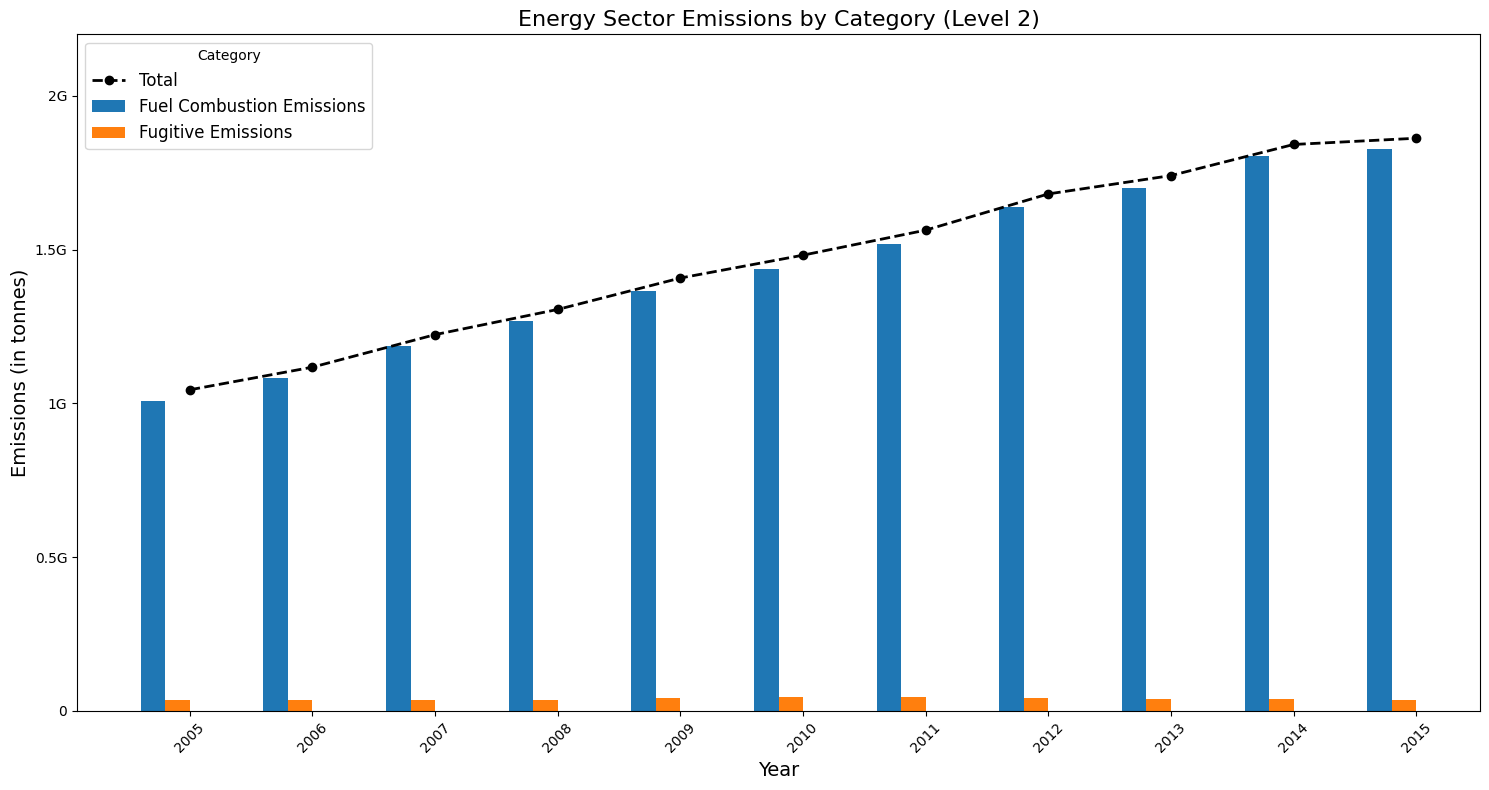

In [434]:

import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

# Remove the 'Total' row for category-based plotting
category_df = energy_yearly_emissions_by_category_level2_and_total[
    energy_yearly_emissions_by_category_level2_and_total['Category'] != 'Total'
]

# Extract the "Total" row for line plotting
total_emissions = energy_yearly_emissions_by_category_level2_and_total[
    energy_yearly_emissions_by_category_level2_and_total['Category'] == 'Total'
]

# List of years
years = [str(year) for year in range(2005, 2016)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Bar width
bar_width = 0.2
x_indexes = range(len(years))

# Iterate through each category and plot its bars
for i, category in enumerate(category_df['Category']):
    ax.bar(
        [x + i * bar_width for x in x_indexes],  # Offset bars for each category
        category_df.loc[category_df['Category'] == category, years].values.flatten(),
        width=bar_width,
        label=category
    )

# Plot the total emissions as a line
ax.plot(
    [x + 1.5 * bar_width for x in x_indexes],  # Align with the center of grouped bars
    total_emissions[years].values.flatten(),
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Total'
)

# Customizations
ax.set_title("Energy Sector Emissions by Category (Level 2)", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Emissions (in tonnes)", fontsize=14)
ax.set_xticks([x + 1.5 * bar_width for x in x_indexes])  # Center labels
ax.set_xticklabels(years, rotation=45)

# Set y-axis ticks for 0, 0.5G, 1G, 1.5G, and 2G
ax.yaxis.set_major_locator(FixedLocator([0, 0.5e9, 1e9, 1.5e9, 2e9]))
ax.yaxis.set_major_formatter(FixedFormatter(['0', '0.5G', '1G', '1.5G', '2G']))
ax.set_ylim(0, 2.2e9)  # Ensure the y-axis range includes all ticks

ax.legend(title="Category", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

    

In [270]:

# List of columns representing the years 2005 to 2015
year_columns = [str(year) for year in range(2005, 2016)]

# Dictionary to store results for each category
category_sums = {}

# Calculate the summation for each category in 'Level 1'
for category in energy_filtered_gwp_ar2['Level 3'].unique():
    # Filter rows for the current category
    category_df = energy_filtered_gwp_ar2[energy_filtered_gwp_ar2['Level 3'] == category]
    
    # Sum emissions for each year
    category_sums[category] = category_df[year_columns].sum()

# Convert the dictionary to a DataFrame for easier display and export
category_sums_df = pd.DataFrame(category_sums, index=year_columns).transpose()

# Add a row for the final summation for all categories
category_sums_df.loc['Total'] = category_sums_df.sum()

# Display the results
print(category_sums_df)

# Save the results to a CSV file
category_sums_df.to_csv('energy_yearly_emissions_by_category_level3_and_total.csv')
print("Yearly emissions by category and totals saved to 'energy_yearly_emissions_by_category_level3_and_total.csv'")

                                    2005       2006       2007       2008  \
Transport                      116862139  129788565  141942640  154048829   
Residential                     95877228   97996879  100516918  103725999   
Commercial                       4139905    4942735    6059917    6839308   
Agriculture                     15936586   17012769   21107843   21724851   
Fisheries                        3310420    3508818    3716150    3921259   
Industries                     239005900  270625843  314417090  339582399   
Fuel Production                 35465736   35136238   35745254   36663088   
Public Electricity Generation  533564486  558729632  600039456  638958187   
Total                         1044162402 1117741478 1223545268 1305463921   

                                    2009       2010       2011       2012  \
Transport                      169404886  186706291  201914437  215701537   
Residential                    103449634  103892890  104241299  102703299  

In [271]:
energy_yearly_emissions_by_category_level3_and_total = pd.read_csv('energy_yearly_emissions_by_category_level3_and_total.csv')

In [272]:
# Rename the unnamed column (assuming it's the first column)
energy_yearly_emissions_by_category_level3_and_total = energy_yearly_emissions_by_category_level3_and_total.rename(columns={energy_yearly_emissions_by_category_level3_and_total.columns[0]: 'Category'})
energy_yearly_emissions_by_category_level3_and_total

,Category,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Transport,116862139,129788565,141942640,154048829,169404886,186706291,201914437,215701537,229453435,236116866,251132440
1,Residential,95877228,97996879,100516918,103725999,103449634,103892890,104241299,102703299,103088810,106764346,110230401
2,Commercial,4139905,4942735,6059917,6839308,7749516,8328517,8890344,9573490,9794951,9504504,10511139
3,Agriculture,15936586,17012769,21107843,21724851,23351552,24480896,26243078,28183916,29422859,28988899,29909284
4,Fisheries,3310420,3508818,3716150,3921259,4135539,4535872,4706145,4893683,5138520,5436102,5693024
5,Industries,239005900,270625843,314417090,339582399,382739219,403747016,417282943,463169745,468787354,493971771,459896458
6,Fuel Production,35465736,35136238,35745254,36663088,43011686,46491747,44743643,42470669,39954899,37903706,36369158
7,Public Electricity Generation,533564486,558729632,600039456,638958187,673752244,703724693,755239373,814352362,855086686,923190369,958372279
8,Total,1044162402,1117741478,1223545268,1305463921,1407594277,1481907922,1563261262,1681048701,1740727515,1841876564,1862114184


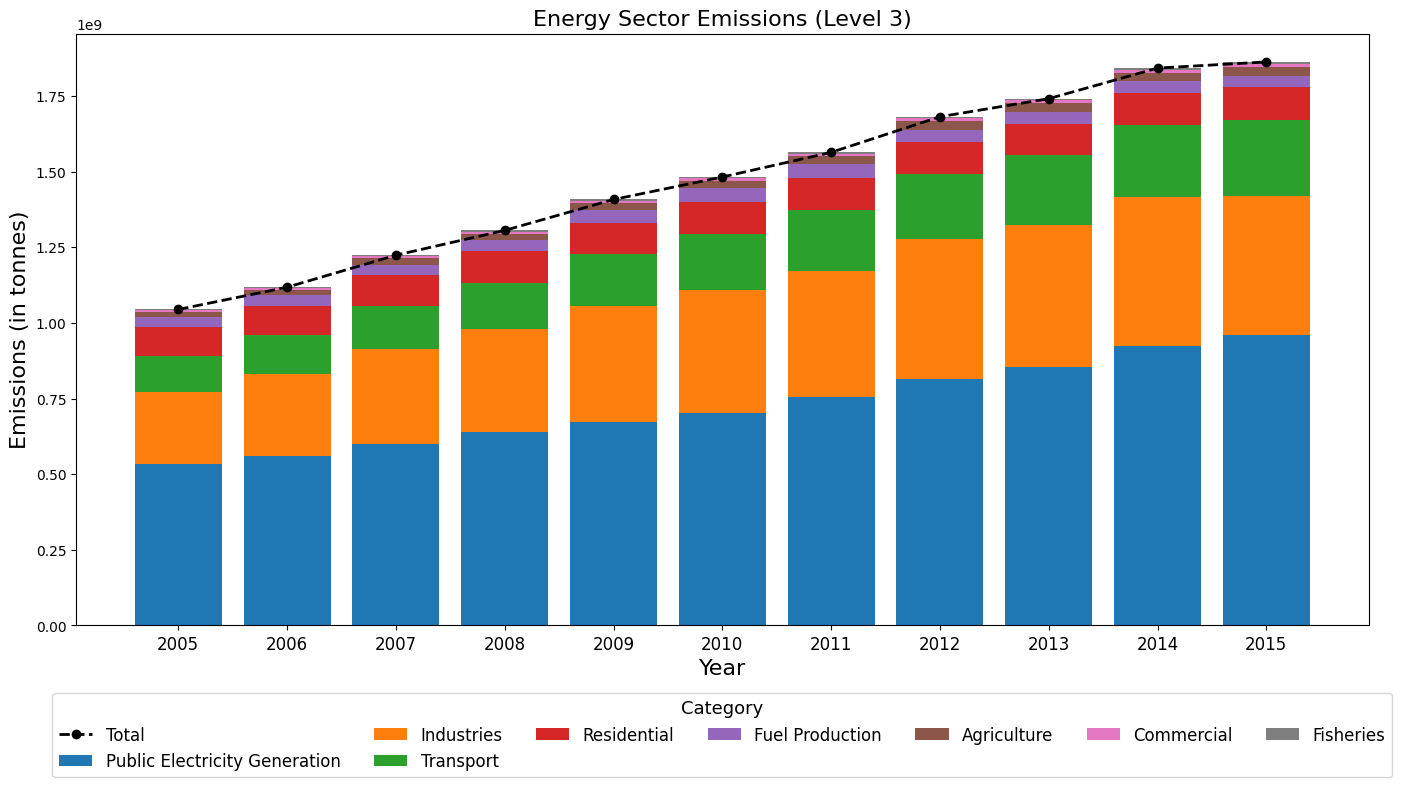

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Remove the 'Total' row for category-based plotting
category_df = energy_yearly_emissions_by_category_level3_and_total[energy_yearly_emissions_by_category_level3_and_total['Category'] != 'Total']

# Extract the "Total" row for line plotting
total_emissions = energy_yearly_emissions_by_category_level3_and_total[energy_yearly_emissions_by_category_level3_and_total['Category'] == 'Total']

# List of years
years = [str(year) for year in range(2005, 2016)]

# Prepare data for the stacked bar chart
category_data = category_df.set_index('Category')[years].T  # Transpose for stacking

# Sort the emission values by category size (from largest to smallest for each year)
category_data_sorted = category_data.apply(lambda row: row.sort_values(ascending=False), axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create stacked bar chart
bottom_values = np.zeros(len(years))  # To track cumulative bottoms for stacking

# Iterate through the sorted data and stack the bars in order
for category in category_data_sorted.columns:
    ax.bar(
        years, 
        category_data_sorted[category], 
        bottom=bottom_values, 
        label=category
    )
    bottom_values += category_data_sorted[category]  # Update bottom values for the next stack

# Plot the total emissions as a line
total_emissions_data = total_emissions[years].values.flatten().astype(float)
ax.plot(
    years, 
    total_emissions_data, 
    color='black', 
    marker='o', 
    linestyle='--', 
    linewidth=2, 
    label='Total'
)

# Customizations
ax.set_title("Energy Sector Emissions (Level 3)", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Emissions (in tonnes)", fontsize=16)

# Increase x-axis tick size and make them horizontal
plt.xticks(range(len(years)), years, fontsize=12, rotation=0)  # Increase font size and set rotation to 0

# Move the legend below the plot
ax.legend(title="Category", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=7, title_fontsize=13)

# Show the plot
plt.tight_layout()
plt.show()
